In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [4]:
%cd C:\C:\Users\LENOVO\project\Gendent detection

[WinError 123] The filename, directory name, or volume label syntax is incorrect: 'C:\\C:\\Users\\LENOVO\\project\\Gendent detection'
c:\Users\LENOVO\project


In [5]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(r'C:\Users\LENOVO\project\Gendent detection', target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 499 images belonging to 2 classes.


{'Nam': 0, 'Nữ': 1}

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)
Score=model.evaluate(Train,verbose=0)

print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Epoch 1/50
16/16 [==============================] - 56s 3s/step - loss: 8.7713 - accuracy: 0.4669
Epoch 2/50
16/16 [==============================] - 41s 2s/step - loss: 0.4757 - accuracy: 0.7896
Epoch 3/50
16/16 [==============================] - 32s 2s/step - loss: 0.3098 - accuracy: 0.8697
Epoch 4/50
16/16 [==============================] - 32s 2s/step - loss: 0.2458 - accuracy: 0.8918
Epoch 5/50
16/16 [==============================] - 32s 2s/step - loss: 0.1797 - accuracy: 0.9218
Epoch 6/50
16/16 [==============================] - 34s 2s/step - loss: 0.1684 - accuracy: 0.9319
Epoch 7/50
16/16 [==============================] - 32s 2s/step - loss: 0.1790 - accuracy: 0.9279
Epoch 8/50
16/16 [==============================] - 32s 2s/step - loss: 0.1540 - accuracy: 0.9339
Epoch 9/50
16/16 [==============================] - 32s 2s/step - loss: 0.2113 - accuracy: 0.9198
Epoch 10/50
16/16 [==============================] - 33s 2s/step - loss: 0.1639 - accuracy: 0.9399
Epoch 11/50
16/16 [

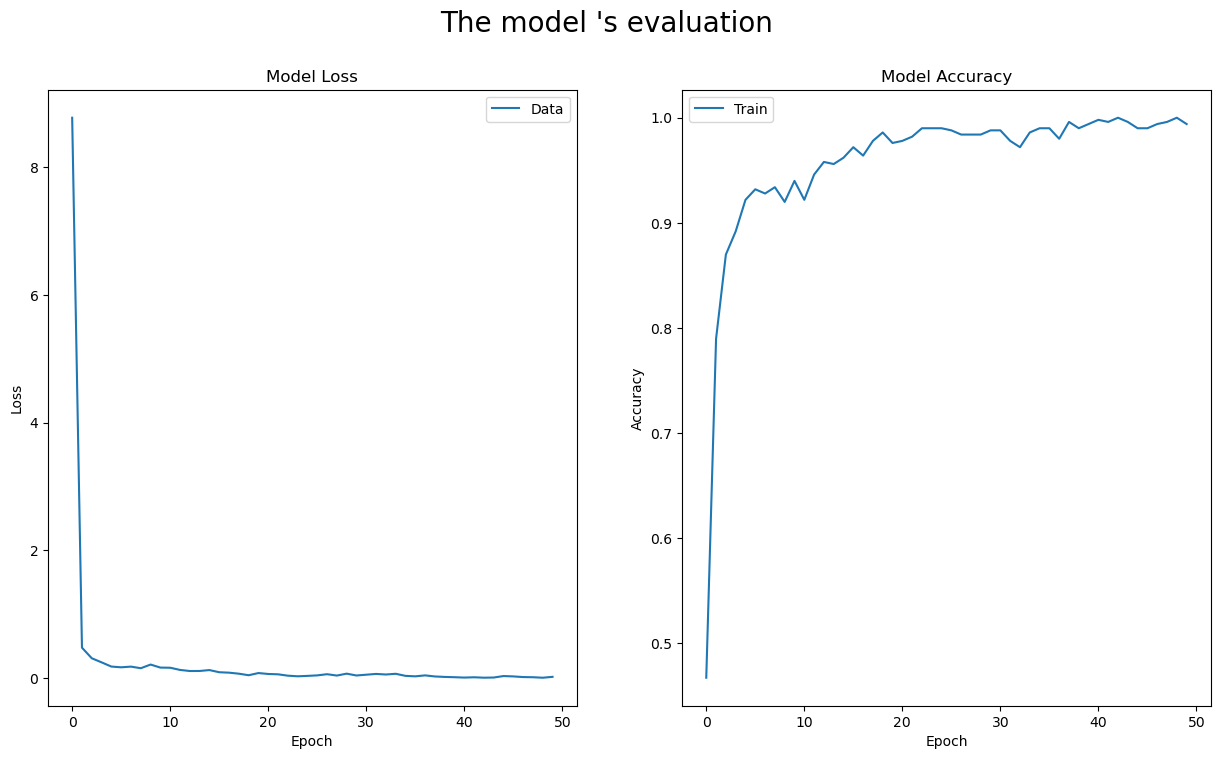

In [8]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [9]:
model.save(r'C:\Users\LENOVO\project\Gendent detection.h5')



In [10]:
model_1 = load_model(r'C:\Users\LENOVO\project\Gendent detection.h5')